In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = "MatrizPPI.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

       ID_CIDERH REGION   FECHA_RBE  PP_RBE      LAT_Y      LON_X
0       FM_001_A      I  2006-08-01     0.0 -19.117415 -69.242992
1       FM_001_A      I  2006-08-02     0.0 -19.117415 -69.242992
2       FM_001_A      I  2006-08-03     0.0 -19.117415 -69.242992
3       FM_001_A      I  2006-08-04     0.0 -19.117415 -69.242992
4       FM_001_A      I  2006-08-05     0.0 -19.117415 -69.242992
...          ...    ...         ...     ...        ...        ...
192316   M_005_A      I  1988-06-18     0.0 -19.850881 -68.859900
192317   M_005_A      I  1988-06-19     0.0 -19.850881 -68.859900
192318   M_005_A      I  1988-06-20     0.0 -19.850881 -68.859900
192319   M_005_A      I  1988-06-21     0.0 -19.850881 -68.859900
192320   M_005_A      I  1988-06-22     0.0 -19.850881 -68.859900

[192321 rows x 6 columns]


In [2]:
df_original = pd.read_csv('MatrizPPI.csv')

df_nuevo = pd.DataFrame()

for estacion in df_original['ID_CIDERH'].unique():
    df_estacion = df_original[df_original['ID_CIDERH'] == estacion]
    
    df_nuevo[estacion] = df_estacion['PP_RBE'].reset_index(drop=True)

df_nuevo.to_csv('VMTPPI.csv', index=False)

archivo_csv2 = "VMTPPI.csv"
datos2 = pd.read_csv(archivo_csv2)

print(datos2)

     FM_001_A  FM_002_A  M_001_A  M_001_AH  M_001_AJ  M_001_Q  M_002_A  \
0         0.0       0.4      0.0       0.0       0.0      0.0      4.0   
1         0.0       0.1      0.0       0.0       0.0      0.0      0.0   
2         0.0       1.5      0.0       0.0       0.0      0.0      0.0   
3         0.0       1.2      0.1       0.0       0.0      1.8      1.0   
4         0.0       1.4      0.0       0.0       0.0      1.8      0.0   
..        ...       ...      ...       ...       ...      ...      ...   
819       0.0       0.0      0.0       0.0       0.0      0.2      0.0   
820       0.0       0.0      0.0       0.0       0.0      0.0      0.0   
821       0.0       0.0      0.0       0.0       0.0      0.8      0.0   
822       0.0       0.0      0.0       0.0       0.0      0.0      0.0   
823       0.0       0.0      0.0       0.0       0.0      0.0      0.0   

     M_002_AH  M_002_AJ  M_002_H  ...  M_022_A  M_023_A  M_024_A  M_025_A  \
0         2.0       0.0      0.0  

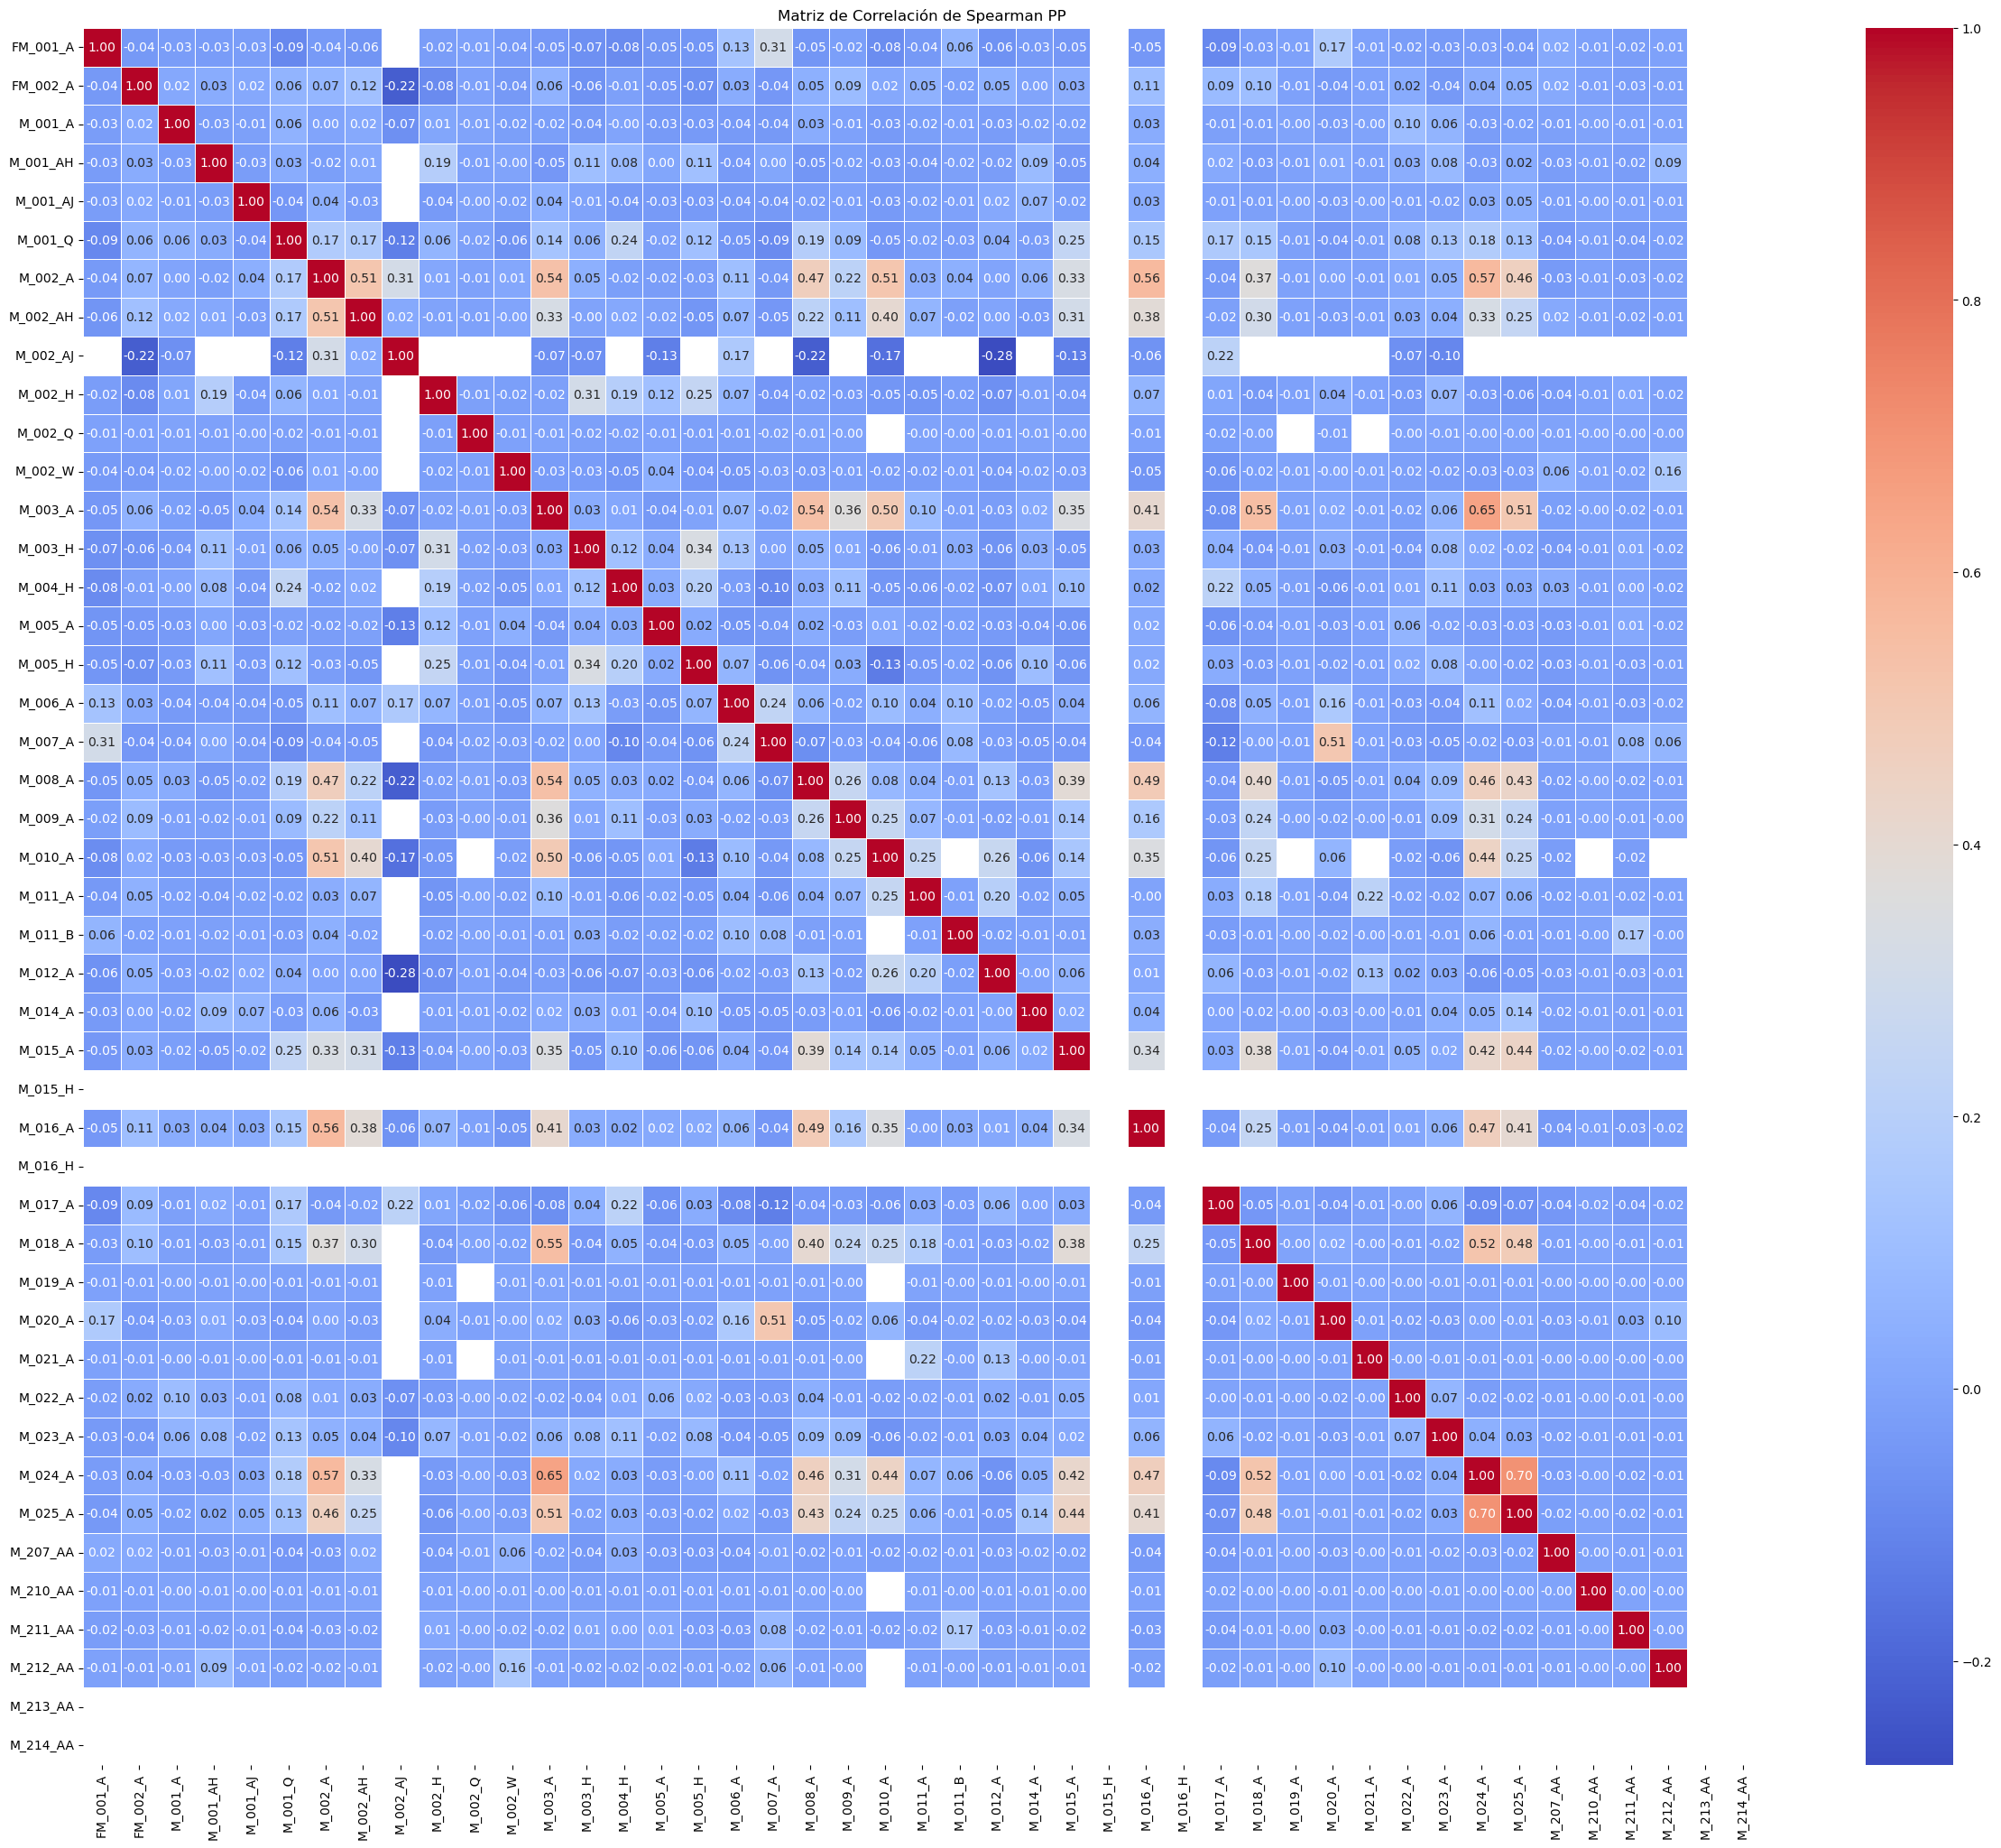

In [3]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman PP")
plt.show()

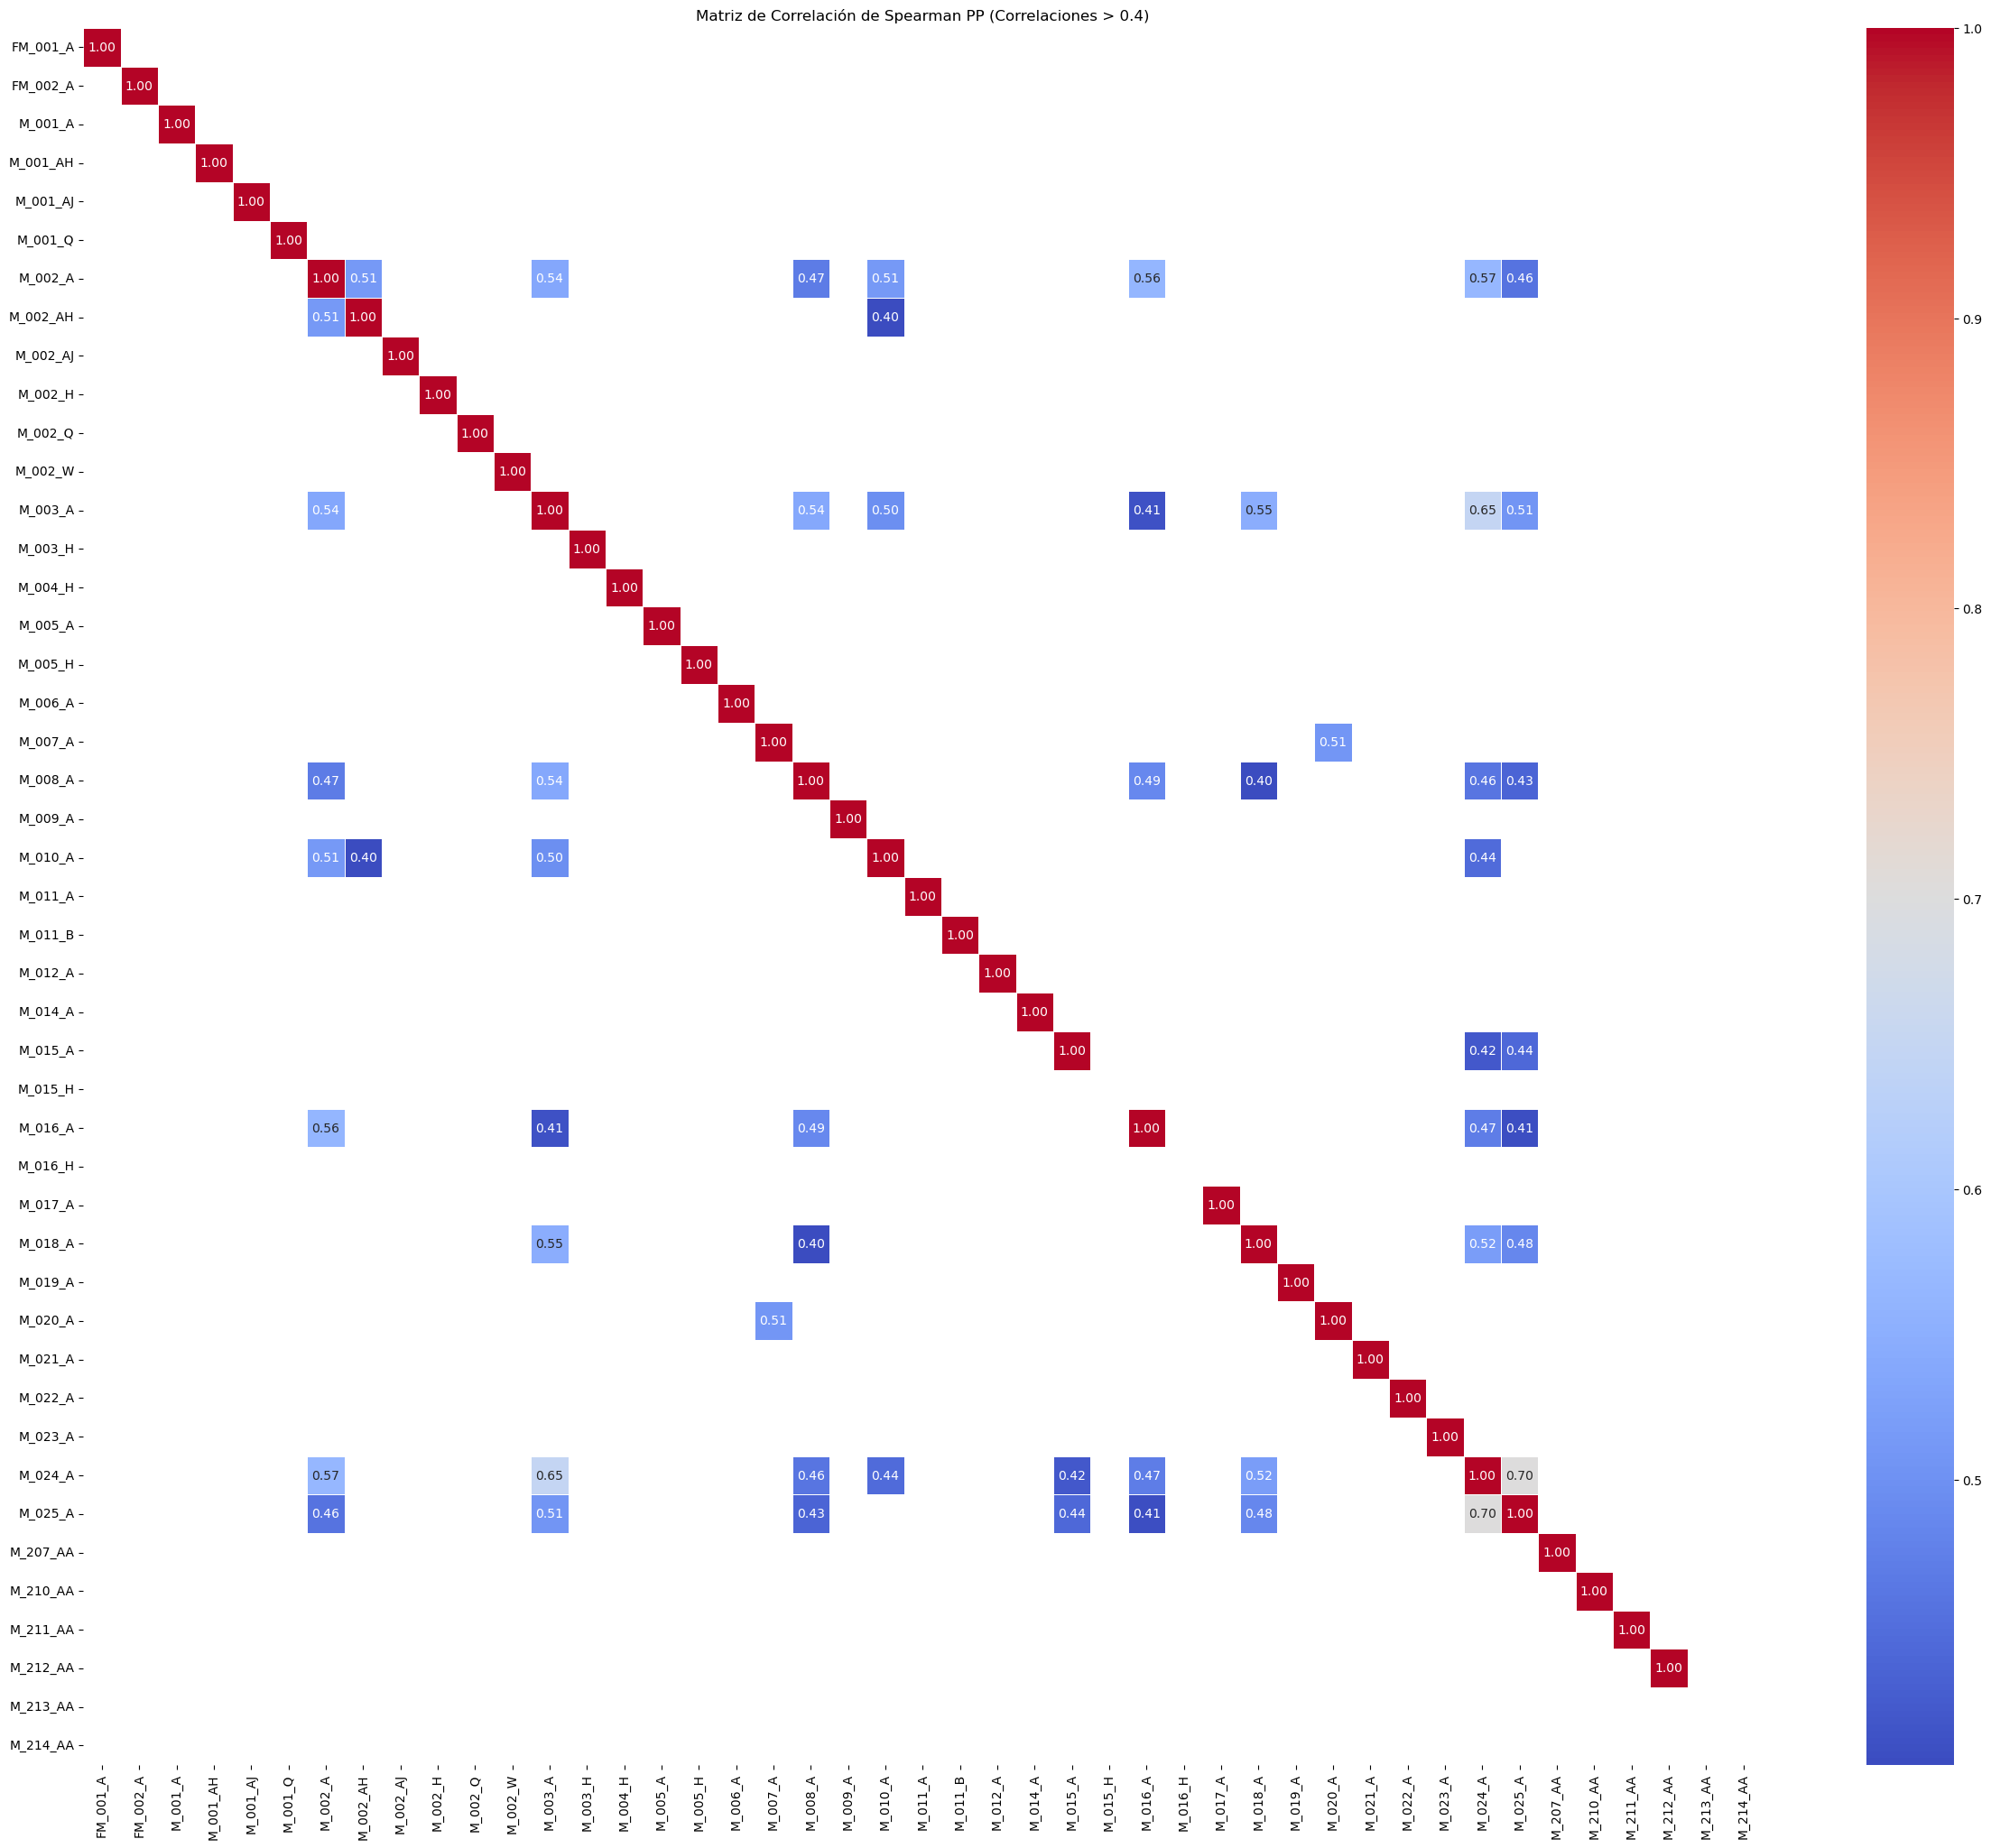

In [5]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

# Filtrar las correlaciones mayores a 0.4
matriz_filtrada = matriz_correlacion[matriz_correlacion.abs() > 0.4]

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_filtrada, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman PP (Correlaciones > 0.4)")
plt.show()

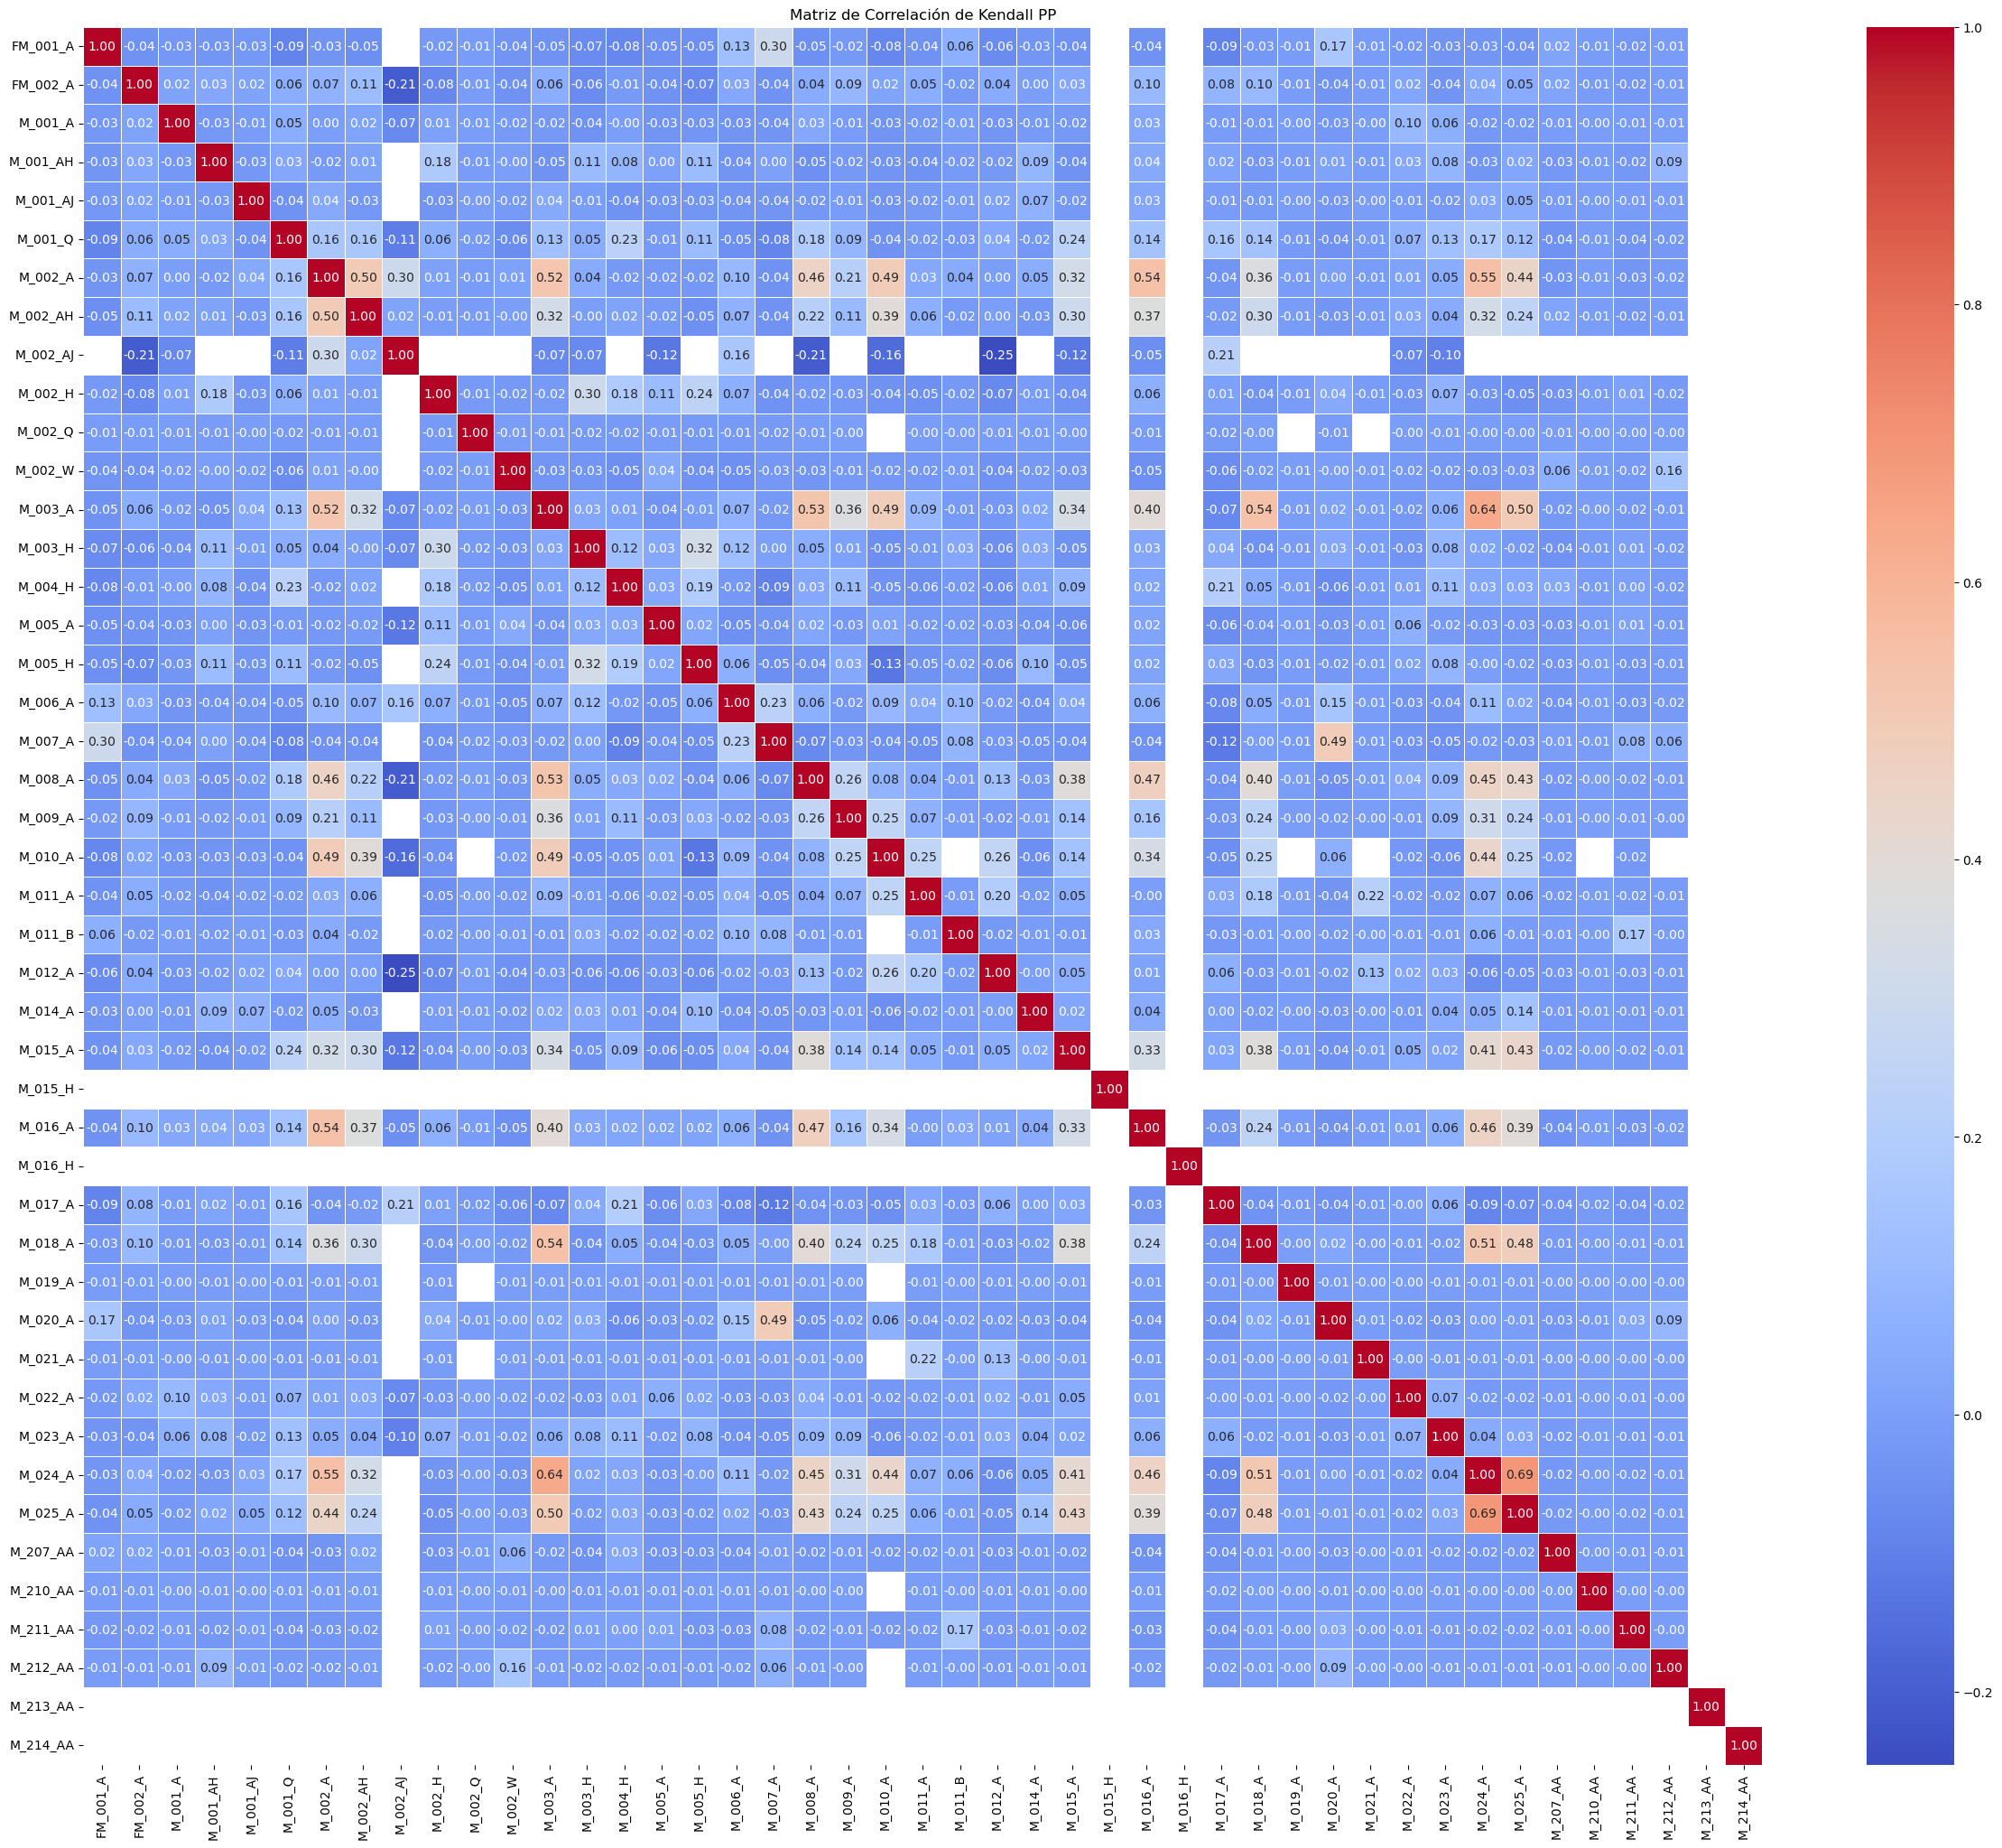

In [4]:
# Seleccionar solo las columnas numéricas
datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de Kendall
matriz_correlacion_kendall = datos_numericos.corr(method='kendall')

# Crear el heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion_kendall, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Kendall PP")
plt.show()

In [2]:
import folium
import pandas as pd

# Lee el archivo CSV con las latitudes y longitudes
data = pd.read_csv('MatrizPPI.csv', encoding='latin-1', low_memory=False)

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[data['LAT_Y'].mean(), data['LON_X'].mean()], zoom_start=10)

# Utiliza un conjunto para realizar un seguimiento de las estaciones ya agregadas
estaciones_agregadas = set()

# Añade marcadores para cada estación meteorológica usando 'ID_CIDERH'
for index, row in data.iterrows():
    # Verifica si la estación ya ha sido agregada
    if row['ID_CIDERH'] not in estaciones_agregadas:
        popup_text = f"ID_CIDERH: {row['ID_CIDERH']}"
        # Añade el marcador con el nombre de la estación
        folium.Marker([row['LAT_Y'], row['LON_X']], popup=popup_text).add_to(mapa)
        # Agrega la estación al conjunto
        estaciones_agregadas.add(row['ID_CIDERH'])

# Guarda el mapa como un archivo HTML
mapa.save('Mapa_Estaciones_I.html')